In [ ]:
# To add a new cell, type '# %%'
# To add a new markdown cell, type '# %% [markdown]'
# %%
from IPython import get_ipython


In [4]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")



Bad key "text.kerning_factor" on line 4 in
/home/sina/anaconda3/envs/tf/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # dataviz
import seaborn as sns # dataviz
from pandas.plotting import scatter_matrix

Rental= pd.read_csv("./dataset/immo_data.csv")

get_ipython().run_line_magic('matplotlib', 'inline')


In [ ]:
Rental.describe() #shows a summary of the numerical attributes


In [6]:
Berlin=Rental.loc[Rental["regio2"]=='Berlin']
print(Berlin)


regio1  serviceCharge                     heatingType telekomTvOffer  \
19      Berlin         250.00                   floor_heating  ONE_YEAR_FREE   
48      Berlin         125.00                district_heating  ONE_YEAR_FREE   
85      Berlin         230.00                     gas_heating  ONE_YEAR_FREE   
104     Berlin         105.00                 central_heating  ONE_YEAR_FREE   
151     Berlin         206.00                 central_heating  ONE_YEAR_FREE   
...        ...            ...                             ...            ...   
268729  Berlin         100.00                 central_heating  ONE_YEAR_FREE   
268800  Berlin         350.00                 central_heating  ONE_YEAR_FREE   
268831  Berlin          80.04  self_contained_central_heating  ONE_YEAR_FREE   
268834  Berlin         324.47                 central_heating  ONE_YEAR_FREE   
268848  Berlin         233.08                 central_heating  ONE_YEAR_FREE   

        telekomHybridUploadSpeed  newlyConst  b

In [4]:
corr_matrix = Berlin.corr()
corr_matrix["totalRent"].sort_values(ascending=False)


totalRent                   1.000000
baseRent                    0.876431
livingSpace                 0.747748
serviceCharge               0.701983
baseRentRange               0.630741
livingSpaceRange            0.629388
noRoomsRange                0.517548
heatingCosts                0.439351
noRooms                     0.415801
picturecount                0.297007
hasKitchen                  0.220137
lift                        0.197116
yearConstructedRange        0.179634
balcony                     0.145889
cellar                      0.105148
newlyConst                  0.097460
garden                      0.097199
floor                       0.068278
yearConstructed             0.066111
numberOfFloors              0.041601
lastRefurbish               0.034407
pricetrend                  0.015857
electricityBasePrice        0.006113
electricityKwhPrice        -0.006113
scoutId                    -0.025795
noParkSpaces               -0.038506
telekomUploadSpeed         -0.062011
t

In [ ]:
Berlin.corr()["baseRent"].sort_values(ascending=False)


In [ ]:
attributes = ["baseRent","totalRent","livingSpace", "serviceCharge", "noRooms","heatingCosts","picturecount"]
scatter_matrix(Berlin[attributes], figsize=(16, 12))
scatter_matrix


In [ ]:
Berlin["totalRent"].describe()


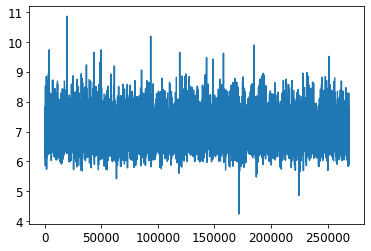

In [6]:
plt.plot(np.log(Berlin["totalRent"]))


Text(0, 0.5, 'Count')

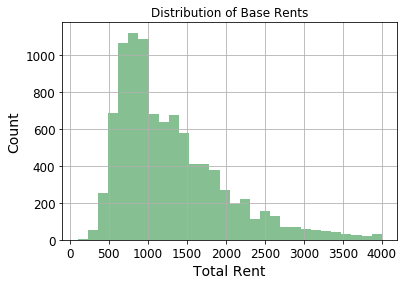

In [7]:
Berlin['totalRent'].hist(bins=30, range=(100,4000), grid=True, color='#86bf91')
plt.title('Distribution of Base Rents')
plt.xlabel('Total Rent')
plt.ylabel('Count')


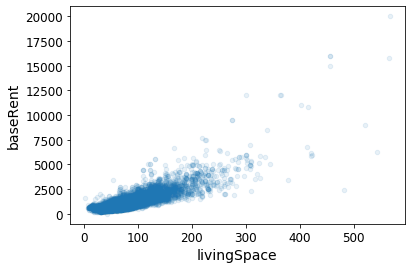

In [8]:
Berlin.plot(kind="scatter", x="livingSpace", y="baseRent", alpha=0.1)


In [7]:
m=Berlin.groupby(['regio3'])['baseRent'].mean()
m.sort_values()


regio3
Marzahn_Marzahn                           500.651438
Hellersdorf_Hellersdorf                   546.908897
Haselhorst_Spandau                        608.990000
Staaken_Spandau                           610.255091
Neu_Hohenschönhausen_Hohenschönhausen     612.841250
                                            ...     
Rummelsburg_Lichtenberg                  1776.020000
Dahlem_Zehlendorf                        1808.883448
Gatow_Spandau                            1825.090000
Mitte_Mitte                              1896.462699
Grunewald_Wilmersdorf                    2449.683763
Name: baseRent, Length: 79, dtype: float64

In [8]:
#droping initial columns
cols_to_drop = ["telekomHybridUploadSpeed", "picturecount", "telekomUploadSpeed",
                "geo_bln", "houseNumber", "geo_krs", "geo_plz", "regio3", "description",
                "facilities"]

Berlin = Berlin.drop(cols_to_drop, axis=1)

#Columns with several NULL entries are dropped too.

Berlin.isna().sum()

#filter columns for berlin
Berlin = Berlin[Berlin["regio2"]=="Berlin"]

#sorting and re_indexing regarding to the price
Berlin = Berlin.sort_values(by=['totalRent'])
Berlin = Berlin.reset_index(drop=True)

#filter some columns between specific amount of values
Berlin = Berlin.query("totalRent >= 100").query("totalRent<10000")
Berlin = Berlin.query("baseRent >= 100").query("baseRent<10000")
Berlin = Berlin.query("livingSpace >= 10").query("livingSpace<400")
Berlin = Berlin.query("noRooms >= 0").query("noRooms<15")




# Replacing columns with f/t with 0/1
Berlin.replace({False: 0, True: 1}, inplace=True)


In [9]:
#make a single binary variable to indicate if the apartment is refurbished/new
Berlin['refurbished'] = (Berlin.condition == 'refurbished') | (Berlin.condition == 'first_time_use') | (Berlin.condition == 'mint_condition') | (Berlin.condition == 'fully_renovated') | (Berlin.condition == 'first_time_use_after_refurbishment')

#make a binary variable to indicate if the rental property has good interior
Berlin['greatInterior'] = (Berlin.interiorQual == 'sophisticated') | (Berlin.interiorQual == 'luxury')

#make a binary variable to indicated if the rental property has good heating
Berlin['goodHeating'] = (Berlin.heatingType == 'central_heating') | (Berlin.heatingType == 'floor_heating') | (Berlin.heatingType == 'self_contained_central_heating')

#make a binary variable to identify rental ads from last year to factor in any inflationary effects.
Berlin['2018_ads'] = (Berlin.date == 'Sep18')

#transform totalRent into log(totalRent) to get a better distribution + better interpretive quality
Berlin['logRent'] = np.log(Berlin['totalRent'])


In [10]:
y_var = ['logRent']
X_var = ['balcony', 'hasKitchen', 'cellar', 'livingSpace', 'noRooms', 'garden',
         'refurbished', 'greatInterior', 'newlyConst',
         '2018_ads', 'lift']

y = Berlin[y_var].iloc[:,0].values
X = Berlin[X_var].iloc[:,0].values
#y = Berlin[y_var].values
#X = Berlin[X_var].values

#print(X)
#print(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    random_state=0)


In [ ]:
#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
from sklearn import metrics

def linearregression(xtrain, ytrain, xtest, ytest):
    linreg = LinearRegression()
    linreg.fit(xtrain, ytrain)
    y_pred = linreg.predict(xtest)
    print('MAE:', metrics.mean_absolute_error(ytest, y_pred))
    print('MSE:', metrics.mean_squared_error(ytest, y_pred))

linearregression(X_train, y_train, X_test, y_test)


In [ ]:

#RANDOM FOREST
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

#Best hyperparamters from the Random Search:
#minsamleaf: 30, maxfeat: 11, maxdepth: 24 

def randomforestreg(msl, mf, md, xtrain, ytrain, xtest, ytest):
    rfr_best = RandomForestRegressor(n_estimators=70, random_state=1111,
                                     max_depth=md, max_features=mf, min_samples_leaf=msl)
    rfr_best.fit(xtrain,ytrain)
    y_pred_rfr = rfr_best.predict(xtest)
    print('MAE:', metrics.mean_absolute_error(ytest, y_pred_rfr))
    print('MSE:', metrics.mean_squared_error(ytest, y_pred_rfr))
    
randomforestreg(30, 11, 24, X_train, y_train, X_test, y_test)


In [ ]:
#GRADIENT BOOSTING
from sklearn.ensemble import GradientBoostingRegressor

#Best hyperparameters from Random Search:
#maxdepth: 16, minsamleaf: 117, n: 73, maxfeat: 10, lr: 0.07
def gradientboostingmachine(md, msl, n, mf, lr, xtrain, ytrain, xtest, ytest):
    gbm_best = GradientBoostingRegressor(n_estimators=n, random_state=1111,
                                         max_depth=md, max_features=mf, 
                                         min_samples_leaf=msl, learning_rate=lr
                                         )
    gbm_best.fit(xtrain, ytrain)
    y_pred_gbm = gbm_best.predict(xtest)
    print('MAE:', metrics.mean_absolute_error(ytest, y_pred_gbm))
    print('MSE:', metrics.mean_squared_error(ytest, y_pred_gbm))
    
gradientboostingmachine(16, 117, 73, 10, 0.07, X_train, y_train, X_test, y_test)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
lin_reg = LinearRegression()


scores = cross_val_score(lin_reg, X_train, y_train,
                        scoring="neg_mean_squared_error", cv=10)

# find root mean squared error, scores is an array of negative numbers
rmse_scores = np.sqrt(-scores)

print("Mean:\t\t ", rmse_scores.mean(), "\nStandard Deviation:", rmse_scores.std())


In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
forest_scores = cross_val_score(forest_reg, X_train, y_train,
                               scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)


In [ ]:
print("Mean:\t\t ", forest_rmse_scores.mean(), "\nStandard Deviation:", forest_rmse_scores.std())


In [ ]:
def stackedmodel(xtrain, ytrain, xtest, ytest):
    x_training, x_valid, y_training, y_valid = train_test_split(xtrain, ytrain,
                                                                test_size=0.5,
                                                                random_state=42)
    model1 = LinearRegression()
    model2 = RandomForestRegressor(n_estimators=70, random_state=1111,
                                   max_depth=24, max_features=11, 
                                   min_samples_leaf=24)
    model3 = GradientBoostingRegressor(n_estimators=73, random_state=1111,
                                       max_depth=16, max_features=10, 
                                       min_samples_leaf=117, learning_rate=0.07)
    
    model1.fit(x_training, y_training)
    model2.fit(x_training, y_training)
    model3.fit(x_training, y_training)
    
    preds1 = model1.predict(x_valid)
    preds2 = model2.predict(x_valid)
    preds3 = model3.predict(x_valid)
    
    testpreds1 = model1.predict(xtest)
    testpreds2 = model2.predict(xtest)
    testpreds3 = model3.predict(xtest)
    
    stackedpredictions = np.column_stack((preds1, preds2, preds3))
    stackedtestpredictions = np.column_stack((testpreds1, testpreds2,
                                              testpreds3))
    
    metamodel = LinearRegression()
    metamodel.fit(stackedpredictions, y_valid)
    final_predictions = metamodel.predict(stackedtestpredictions)
    print('MAE:', metrics.mean_absolute_error(ytest, final_predictions))
    print('MSE:', metrics.mean_squared_error(ytest, final_predictions))

stackedmodel(X_train, y_train, X_test, y_test)


## more models

In [12]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

y_var = ['logRent']
X_var = ['balcony', 'hasKitchen', 'cellar', 'livingSpace', 'noRooms', 'garden',
         'refurbished', 'greatInterior', 'newlyConst',
         '2018_ads', 'lift']

y = Berlin[y_var].iloc[:,0].values
X = Berlin[X_var].iloc[:,3].values

#print(X)
#print(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    random_state=0)


In [57]:
Berlin[X_var]["livingSpace"]

3        39.55
4        18.56
5        24.31
6        30.33
7        26.52
         ...  
9723    335.00
9725    326.35
9726    220.00
9727    307.00
9729    274.00
Name: livingSpace, Length: 9715, dtype: float64

In [73]:
Berlin[y_var].head()

logRent
3  4.867534
4  5.423848
5  5.480597
6  5.598200
7  5.607272

In [13]:

from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()
linear_regressor.fit(np.array(X_train.reshape(-1, 1)), y_train.reshape(-1, 1))

y_predict = linear_regressor.predict(X_test.reshape(-1, 1))

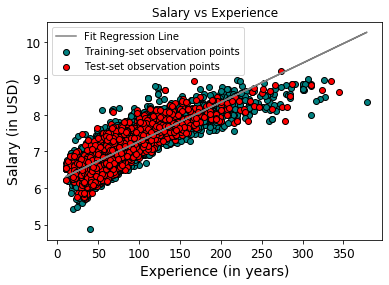

In [14]:
# Plot points and fit line for training data
plt.scatter(X_train, y_train, color='teal', edgecolors='black', label='Training-set observation points')
plt.plot(X_train.reshape(-1, 1), linear_regressor.predict(X_train.reshape(-1, 1)), color='grey', label='Fit Regression Line')
plt.title('Salary vs Experience')
plt.xlabel('Experience (in years)')
plt.ylabel('Salary (in USD)')

# plot scatter points and line for test data
plt.scatter(X_test, y_test, color='red', edgecolors='black', label='Test-set observation points')
plt.legend()
plt.show()

## Polynomial Regression

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
import statsmodels.formula.api as sm
from sklearn.compose import ColumnTransformer


y_var = ['logRent']
X_var = ['balcony', 'hasKitchen', 'cellar', 'livingSpace', 'noRooms', 'garden',
         'refurbished', 'greatInterior', 'newlyConst',
         '2018_ads', 'lift']

y = Berlin[y_var].iloc[:,-1].values
X = Berlin[X_var].iloc[:,:-1].values

#print(X)
#print(y)

# We are going to keep 20% of the dataset in test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/5, random_state=0)

In [16]:
multiple_linear_regressor = LinearRegression()
multiple_linear_regressor.fit(X_train, y_train)

# y_pred contains all the values predicted by trained model
y_pred = multiple_linear_regressor.predict(X_test)

In [28]:
from sklearn.preprocessing import PolynomialFeatures

y_var = ['logRent']
X_var = ['balcony', 'hasKitchen', 'cellar', 'livingSpace', 'noRooms', 'garden',
         'refurbished', 'greatInterior', 'newlyConst',
         '2018_ads', 'lift']

y = Berlin[y_var].iloc[:,0].values
X = Berlin[X_var].iloc[:,3:4].values



In [29]:
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)

In [30]:
# linear regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X, y)

# polynomial regression model
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_poly, y)

LinearRegression()

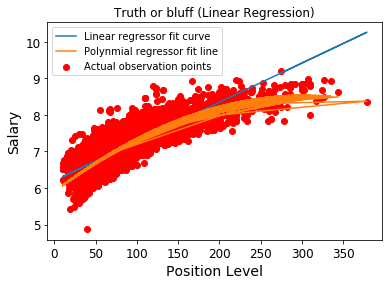

In [31]:
plt.scatter(X, y, color='red', label='Actual observation points')
plt.plot(X, linear_reg_model.predict(X), label='Linear regressor fit curve')
plt.plot(X, poly_reg_model.predict(poly_reg.fit_transform(X)), label='Polynmial regressor fit line')
plt.title('Truth or bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')

plt.legend()
plt.show()

## Simple Vector Regression

In [32]:
from sklearn.svm import SVR

scale_X = StandardScaler()
scale_y = StandardScaler()

X = scale_X.fit_transform(X)
y = scale_y.fit_transform(y.reshape(-1, 1))

In [33]:
svr_regressor = SVR(kernel='rbf', gamma='auto')
svr_regressor.fit(X, y)

SVR(gamma='auto')

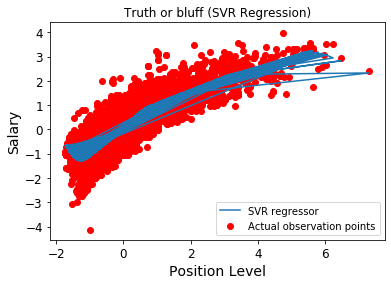

In [34]:
plt.scatter(X, y, color='red', label='Actual observation points')
plt.plot(X, svr_regressor.predict(X), label='SVR regressor')
plt.title('Truth or bluff (SVR Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')

plt.legend()
plt.show()

## Decision Tree - Regression

In [35]:
from sklearn.tree import DecisionTreeRegressor
tree_regressor = DecisionTreeRegressor(random_state = 0)
tree_regressor.fit(X, y)

DecisionTreeRegressor(random_state=0)

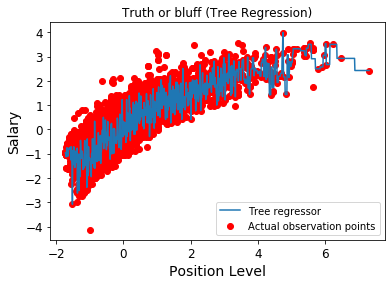

In [36]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape(len(X_grid), 1)

plt.scatter(X, y, color='red', label='Actual observation points')
plt.plot(X_grid, tree_regressor.predict(X_grid), label='Tree regressor')
plt.title('Truth or bluff (Tree Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')

plt.legend()
plt.show()

## Random Forest Regression

In [37]:
from sklearn.ensemble import RandomForestRegressor
forest_regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
forest_regressor.fit(X, y)

RandomForestRegressor(n_estimators=300, random_state=0)

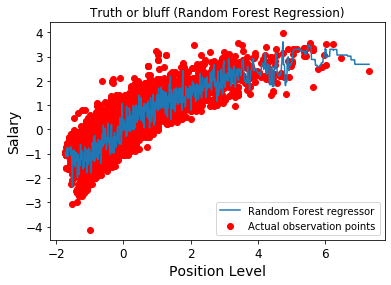

In [38]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape(len(X_grid), 1)

plt.scatter(X, y, color='red', label='Actual observation points')
plt.plot(X_grid, forest_regressor.predict(X_grid), label='Random Forest regressor')
plt.title('Truth or bluff (Random Forest Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')

plt.legend()
plt.show()